<a href="https://colab.research.google.com/github/naveenbteli/Sales-Prediction/blob/master/Walmart_Sales_Prediction_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimising Walmart Sales Forcasting with Machine Learning Techniques

In [26]:
import pandas as pd
import numpy as np
from io import BytesIO
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error


### Import Dataset from Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
df = pd.read_csv('/content/drive/My Drive/Naveen ML resources/Dataset/features.csv')
features = df
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [28]:
df = pd.read_csv('/content/drive/My Drive/Naveen ML resources/Dataset/train.csv')
train = df
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [29]:
df = pd.read_csv('/content/drive/My Drive/Naveen ML resources/Dataset/stores.csv')
stores = df
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


# **Data Preprocessing **

### Merge files to get a csv file with all the features

In [30]:
train_stores = pd.merge(left=train, right=stores, how='left', on='Store')  # Merging Train data and Stores Details
train_stores.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


In [44]:
df = pd.merge(left=train_stores, right=features, how='left', on=['Store','Date','IsHoliday'])  # Merging Train data, Stores and Features
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


### Describing Dataset

In [45]:
print(f'Total number of rows --> {df.shape[0]}')
print(f'Total number of columns --> {df.shape[1]}')

Total number of rows --> 421570
Total number of columns --> 16


In [46]:
df.info()  # Information about the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [47]:
df.describe().T  # Five Point Summary

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
Dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
Size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.00000,202505.000000,219622.000000
Temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
Fuel_Price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
MarkDown1,150681.0,7246.420196,8291.221345,0.270,2240.270000,5347.45000,9210.900000,88646.760000
MarkDown2,111248.0,3334.628621,9475.357325,-265.760,41.600000,192.00000,1926.940000,104519.540000
MarkDown3,137091.0,1439.421384,9623.078290,-29.100,5.080000,24.60000,103.990000,141630.610000
MarkDown4,134967.0,3383.168256,6292.384031,0.220,504.220000,1481.31000,3595.040000,67474.850000


### Find the missing data and fill it with proper values.

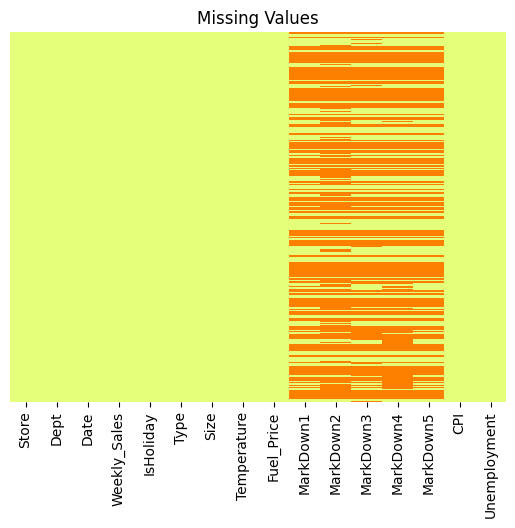

In [48]:
#Plotting a heatmap to check the missing values
sns.heatmap(data = df.isna(), yticklabels=False, cbar=False, cmap='Wistia')
plt.title('Missing Values')
plt.show()

In [49]:
#Imputing the missing values with 0 as it means there is no discount available there
df.fillna(0, inplace=True)

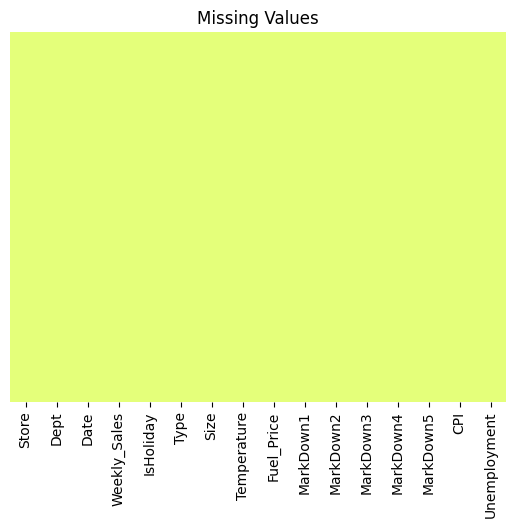

In [50]:
#Plotting a heatmap to check the missing values
sns.heatmap(data = df.isna(), yticklabels=False, cbar=False, cmap='Wistia')
plt.title('Missing Values')
plt.show()

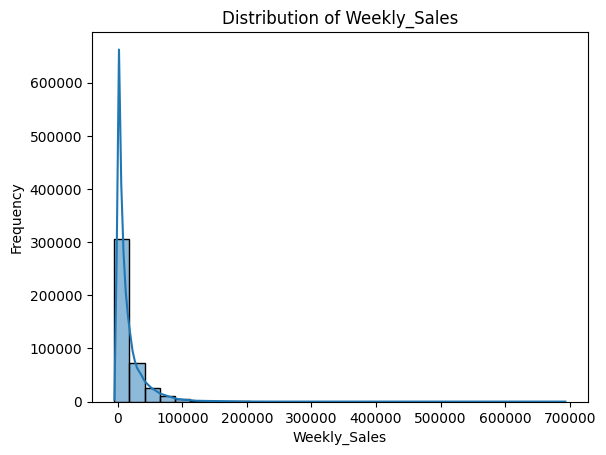

In [51]:
sns.histplot(df['Weekly_Sales'], bins=30, kde=True)  # Include kde=True for Kernel Density Estimation
plt.title('Distribution of Weekly_Sales')
plt.xlabel('Weekly_Sales')
plt.ylabel('Frequency')
plt.show()

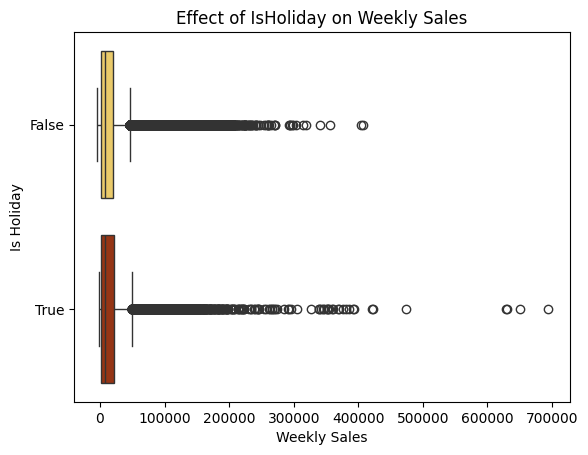

In [52]:
sns.boxplot(
    x='Weekly_Sales',
    y='IsHoliday',
    data=df,
    orient='h',
    hue='IsHoliday',  # Assign hue to the categorical variable
    palette='afmhot_r',
    legend=False  # Suppress the legend since it's redundant
)
plt.title('Effect of IsHoliday on Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Is Holiday')
plt.show()

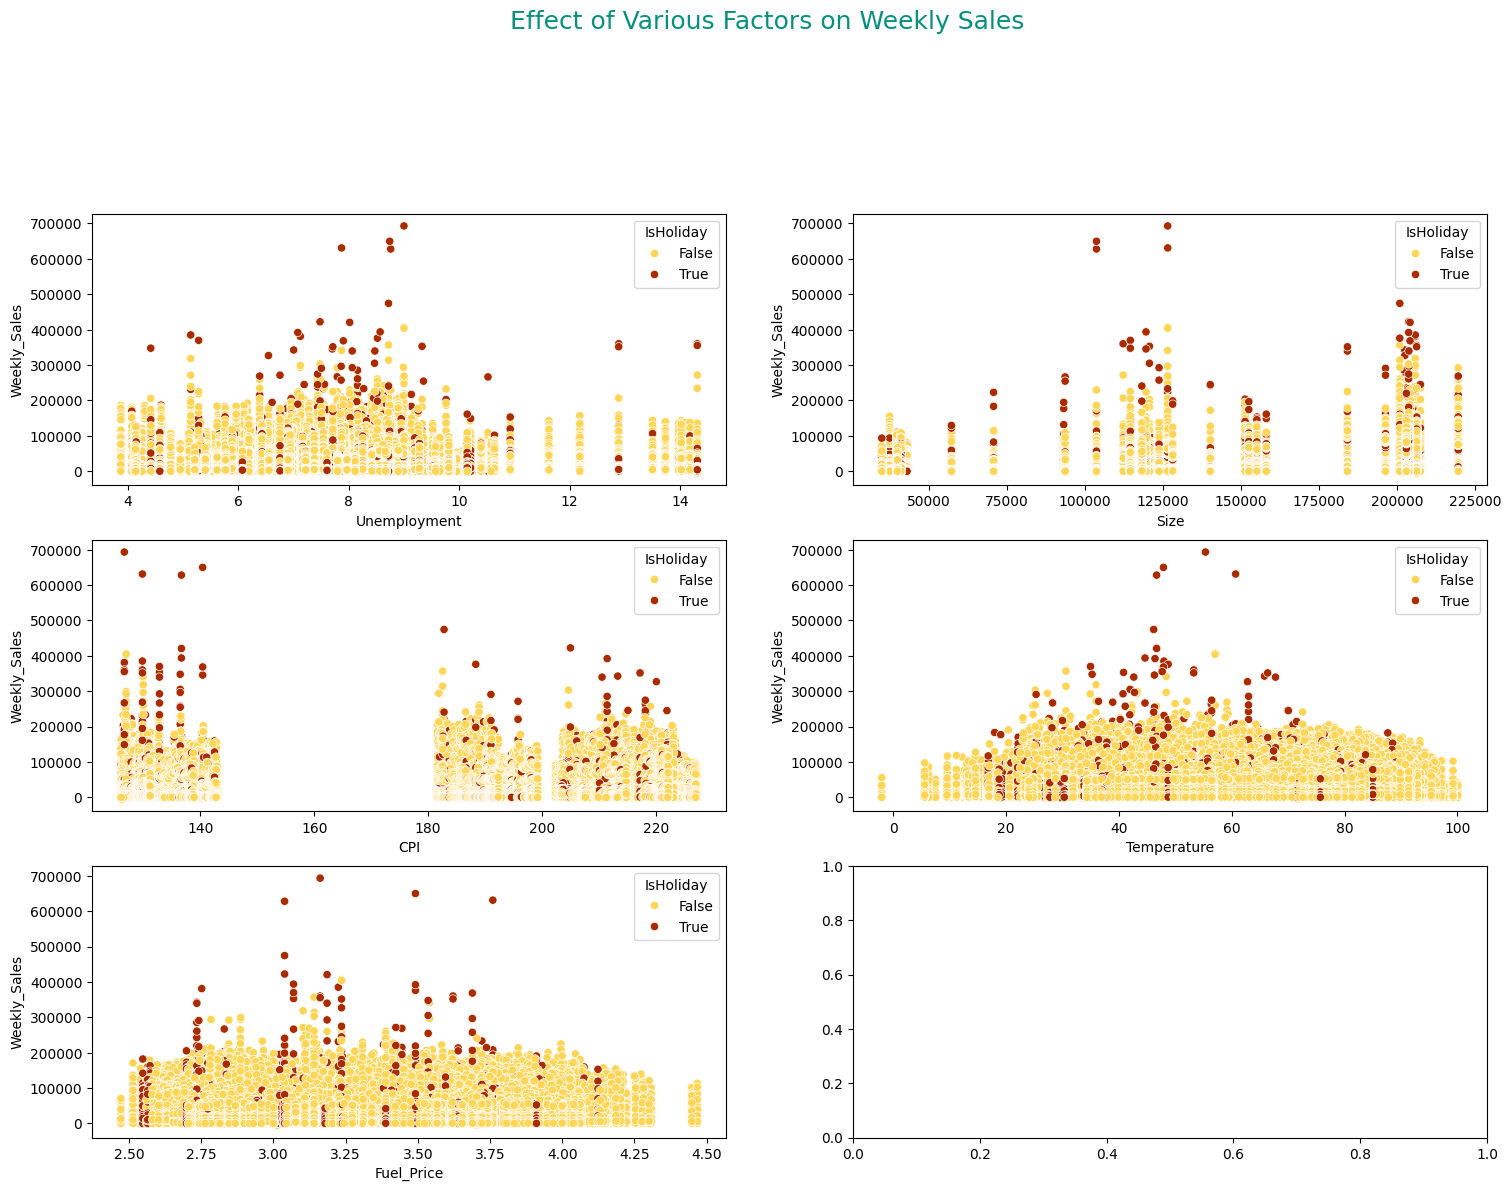

<Figure size 1400x600 with 0 Axes>

In [53]:
fig, axes = plt.subplots(3, 2, figsize=(18, 12))
ax_index = [(i, j) for i in range(3) for j in range(2)]
index_number = 0

fig.suptitle('Effect of Various Factors on Weekly Sales', fontsize=18, color='#06917e', y=1.05)

for i in ['Unemployment', 'Size', 'CPI', 'Temperature', 'Fuel_Price']:
    sns.scatterplot(x=i, y='Weekly_Sales', hue='IsHoliday', data=df, ax=axes[ax_index[index_number]], palette='afmhot_r')
    index_number += 1
plt.figure(figsize=(14, 6))
# Adjust layout
plt.tight_layout()
plt.show()

In [54]:
TypewiseSize = df.groupby(by='Type')['Size']
print("Median Size for Type A Stores --> ",TypewiseSize.get_group('A').median())
print("Median Size for Type B Stores --> ",TypewiseSize.get_group('B').median())
print("Median Size for Type C Stores --> ",TypewiseSize.get_group('C').median())

Median Size for Type A Stores -->  202505.0
Median Size for Type B Stores -->  114533.0
Median Size for Type C Stores -->  39910.0


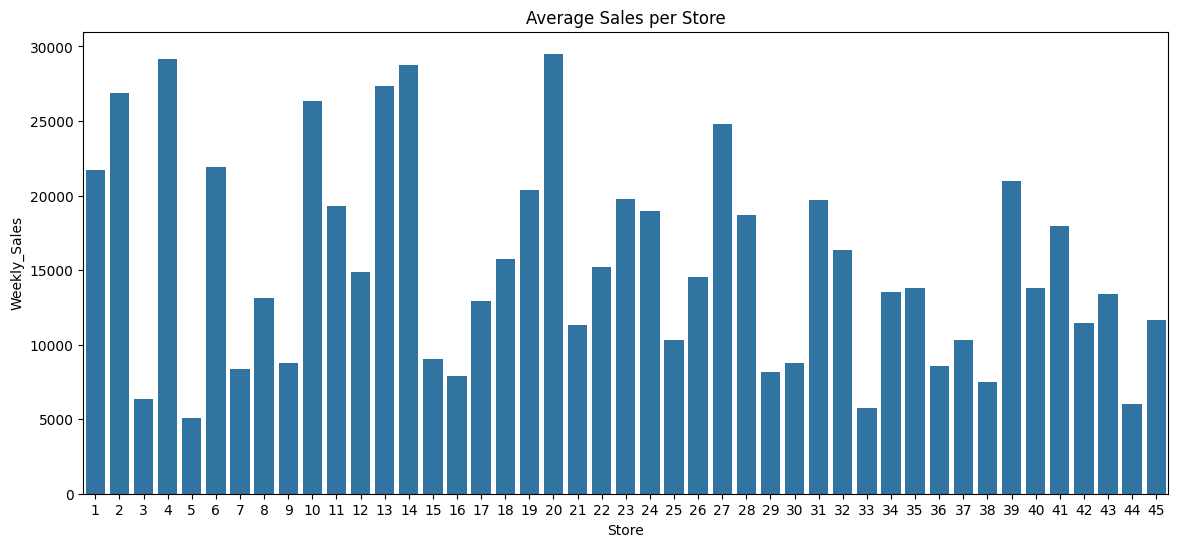

In [55]:
#Average Sales per stores
plt.figure(figsize=(14, 6))
avg_sales_per_store = df.groupby(by='Store')['Weekly_Sales'].mean()
sns.barplot(x = avg_sales_per_store.index, y=avg_sales_per_store)
plt.title('Average Sales per Store')
plt.show()

In [56]:
avg_sales_per_store.sort_values(ascending = False).tail()

,Weekly_Sales
Store,
38,7492.478460
3,6373.033983
44,6038.929814
33,5728.414053
5,5053.415813


In [ ]:
avg_sales_per_store.sort_values(ascending = False).head()

,Weekly_Sales
Store,
20,29508.301592
4,29161.210415
14,28784.851727
13,27355.136891
2,26898.070031


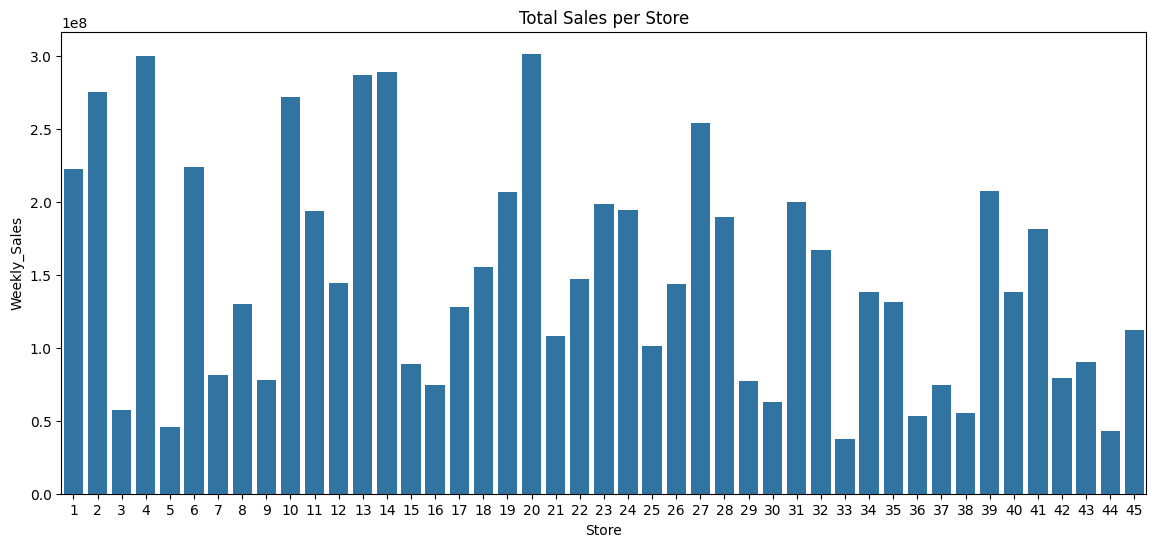

In [17]:
#Total Sales per stores
avg_sales_per_store = df.groupby(by='Store')['Weekly_Sales'].sum()
plt.figure(figsize=(14, 6))
sns.barplot(x = avg_sales_per_store.index, y=avg_sales_per_store)
plt.title('Total Sales per Store')
plt.show()

<ipython-input-85-6b248a682099>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Date'].dt.isocalendar().week, y="Weekly_Sales", data=df, ci=None)


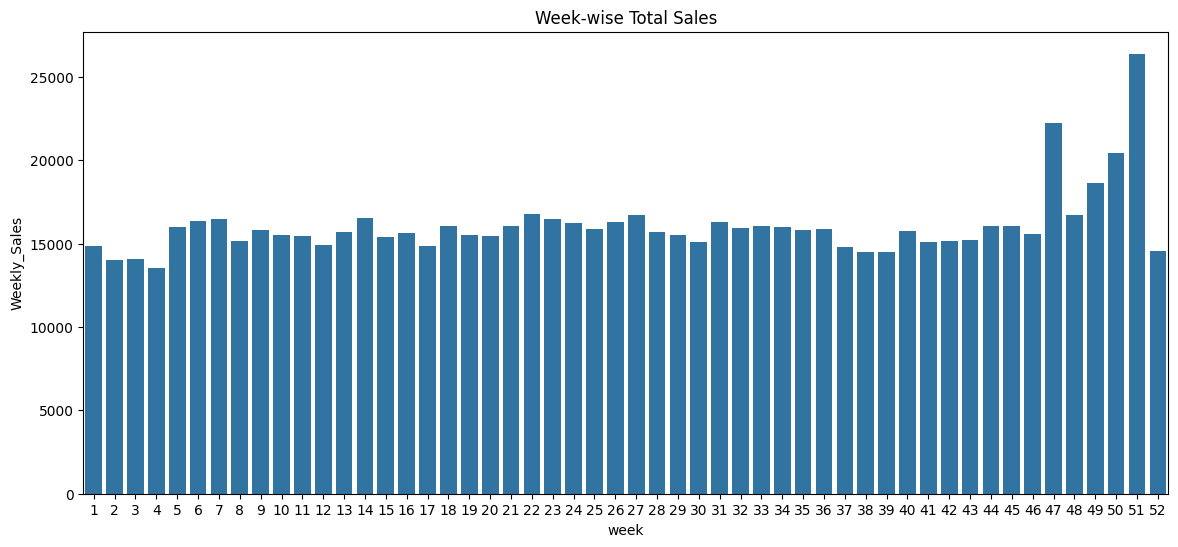

In [ ]:

df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(14, 6))
sns.barplot(x=df['Date'].dt.isocalendar().week, y="Weekly_Sales", data=df, ci=None)
plt.title('Week-wise Total Sales')
plt.show()

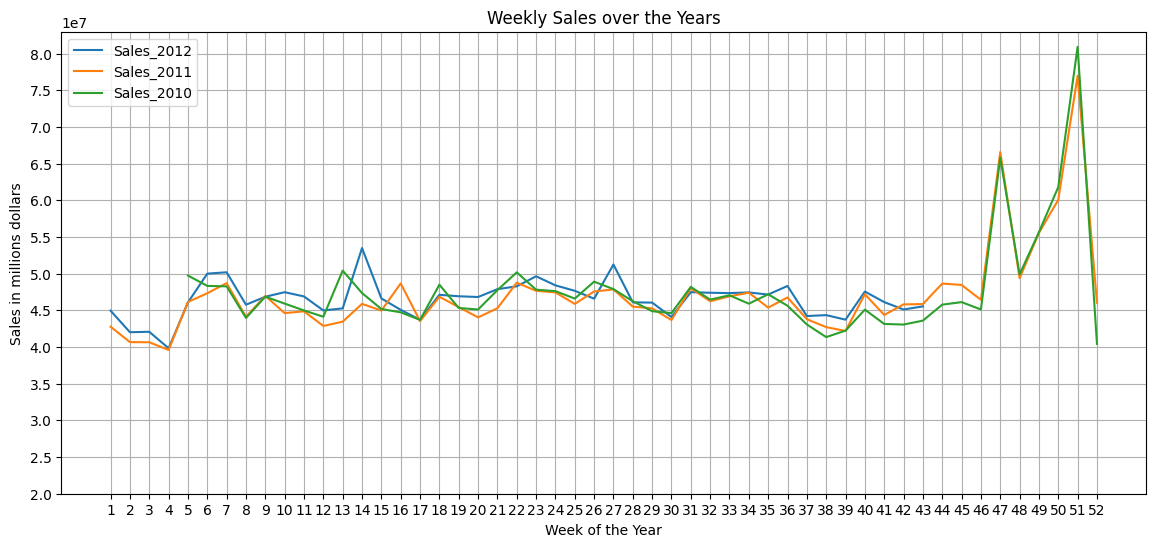

In [ ]:
df_2010 = df.loc[ (df['Date'].dt.year==2010), ['Date', 'Weekly_Sales'] ].groupby(by='Date').sum()
df_2011 = df.loc[ (df['Date'].dt.year==2011), ['Date', 'Weekly_Sales'] ].groupby(by='Date').sum()
df_2012 = df.loc[ (df['Date'].dt.year==2012), ['Date', 'Weekly_Sales'] ].groupby(by='Date').sum()

a10 = pd.DataFrame(data = {'Week_num':df_2010.index.isocalendar().week , 'Sales_2010':df_2010['Weekly_Sales']})
a11 = pd.DataFrame(data = {'Week_num':df_2011.index.isocalendar().week , 'Sales_2011':df_2011['Weekly_Sales']})
a12 = pd.DataFrame(data = {'Week_num':df_2012.index.isocalendar().week , 'Sales_2012':df_2012['Weekly_Sales']})

x = pd.merge(a11, a10, how='outer', on='Week_num')
y = pd.merge(a12, x, how='outer', on='Week_num')
plt.figure(figsize=(14, 6))
for i in y.columns[1:]:
    plt.plot(y['Week_num'], y[i], label=i)
plt.ylabel("Sales in millions dollars")
plt.xlabel("Week of the Year")
plt.xticks(np.arange(1,53))
plt.yticks(np.arange(20000000, 85000000, 5000000))
plt.title('Weekly Sales over the Years')
plt.legend()
plt.grid()
plt.show()

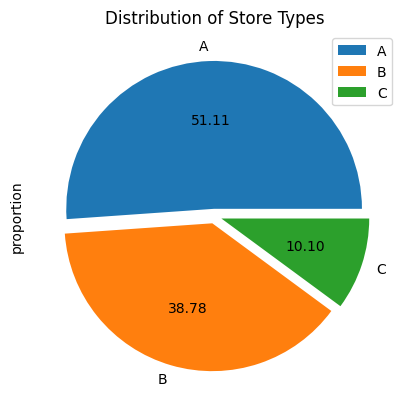

In [ ]:
df['Type'].value_counts(normalize=True).plot(kind='pie', autopct='%.2f', explode=[0.05,0.05,0.05])
plt.legend(df['Type'].value_counts(normalize=True).index, loc = 'upper right')
plt.title('Distribution of Store Types')
plt.show()

In [57]:
data = df
# Convert Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract the week of the year
data['WeekOfYear'] = data['Date'].dt.isocalendar().week
data = data.drop(columns=['Date'])

In [58]:
data

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,WeekOfYear
0,1,1,24924.50,False,A,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,5
1,1,1,46039.49,True,A,151315,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,6
2,1,1,41595.55,False,A,151315,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,7
3,1,1,19403.54,False,A,151315,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,8
4,1,1,21827.90,False,A,151315,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,False,B,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,39
421566,45,98,628.10,False,B,118221,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,40
421567,45,98,1061.02,False,B,118221,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,41
421568,45,98,760.01,False,B,118221,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,42


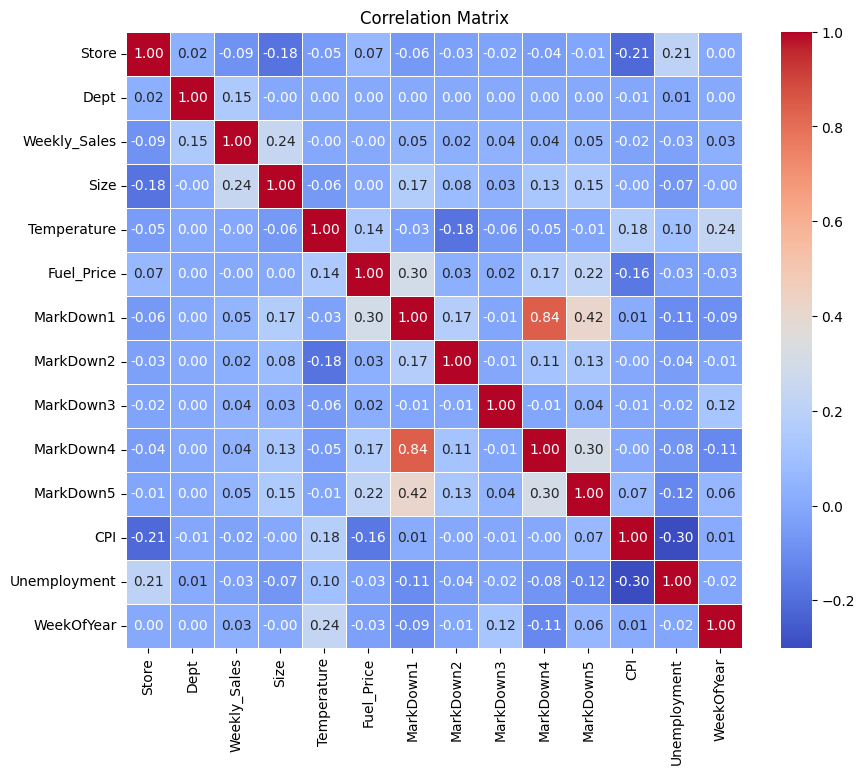

In [59]:
# Select only numeric columns for correlation
numeric_df = data.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Save preprocessed Data in perticular file.

In [ ]:
dataframe = pd.DataFrame(df)
dataframe.to_csv("processed_data.csv",index = False)

In [73]:
df = pd.read_csv('/content/drive/My Drive/Naveen ML resources/Dataset/processed_data.csv')
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106


# **Spliting data into training and testing datasets **

In [74]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort DataFrame by 'Date'
df = df.sort_values(by='Date')

# Extract year and week of the year
df['year'] = df['Date'].dt.year
df['week'] = df['Date'].dt.isocalendar().week

# Drop the original 'date' column
df = df.drop(columns=['Date'])

#Isholiday to int values
df['IsHoliday'] = df['IsHoliday'].astype(int)
# Map 'A', 'B', 'C' to integers
type_mapping = {'A': 0, 'B': 1, 'C': 2}
df['Type'] = df['Type'].map(type_mapping)

# Reordering columns: place 'year' and 'week' at the beginning
columns_order = ['year', 'week'] + [col for col in df.columns if col not in ['year', 'week']]
df = df[columns_order]

In [75]:
df

,year,week,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,2010,5,1,1,24924.50,0,0,151315,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106
277665,2010,5,29,5,15552.08,0,1,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064
277808,2010,5,29,6,3200.22,0,1,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064
277951,2010,5,29,7,10820.05,0,1,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064
278094,2010,5,29,8,20055.64,0,1,93638,24.36,2.788,0.00,0.00,0.00,0.00,0.00,131.527903,10.064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379648,2012,43,40,87,24638.96,0,0,155083,49.65,3.917,3605.71,55.98,0.28,486.81,1389.06,138.728161,4.145
181170,2012,43,19,30,3740.12,0,0,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992
181313,2012,43,19,31,3128.17,0,0,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992
181599,2012,43,19,33,5740.14,0,0,203819,56.49,4.071,5430.75,90.07,0.00,904.34,1665.77,138.728161,7.992


In [76]:
inp = df.drop('Weekly_Sales',axis=1)
out = df['Weekly_Sales']

In [77]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(inp,out,test_size = 0.3, random_state = 40)

In [6]:
# # Calculate the split index
# split_index = int(0.7 * len(df))
# # Get the date at the split index
# split_date = df.iloc[split_index]['Date']

# # Print the split date
# print("The split date for 70% of the data is:", split_date)

# # Now split the DataFrame based on the split date
# train = df[df['Date'] < split_date]
# test = df[df['Date'] >= split_date]
# # Now sort the train and test sets by 'Store' and 'Dept'
# train = train.sort_values(by=['Store', 'Dept'])
# test = test.sort_values(by=['Store', 'Dept'])
# ytrain = train['Weekly_Sales']
# ytest = test['Weekly_Sales']

# xtrain = train.drop('Weekly_Sales',axis=1)
# xtest = test.drop('Weekly_Sales',axis=1)

# xtrain = xtrain.drop('Date',axis=1)
# xtest = xtest.drop('Date',axis=1)
# xtrain.head()

The split date for 70% of the data is: 2012-01-06 00:00:00


#**Model** **Building**


1. Linear Regression

In [9]:

# # Example for One-Hot Encoding
# xtrain = pd.get_dummies(xtrain, drop_first=True)
# xtest = pd.get_dummies(xtest, drop_first=True)

# # Align train and test data
# xtest = xtest.reindex(columns=xtrain.columns, fill_value=0)




In [78]:
# Fit the model
lr = LinearRegression()
lr.fit(xtrain, ytrain)

# Predictions
ypred_train = lr.predict(xtrain)  # Predictions on training set
ypred_test = lr.predict(xtest)   # Predictions on testing set

# Evaluate the model
print('R-Square Value on Train Data:', r2_score(ytrain, ypred_train))
print('R-Square Value on Test Data:', r2_score(ytest, ypred_test))

rmse_train = np.sqrt(mean_squared_error(ytrain, ypred_train))
rmse_test = np.sqrt(mean_squared_error(ytest, ypred_test))

print('RMSE on Train Data:', rmse_train)
print('RMSE on Test Data:', rmse_test)

R-Square Value on Train Data: 0.08740057158329861
R-Square Value on Test Data: 0.08793231583485628
RMSE on Train Data: 21665.278870774513
RMSE on Test Data: 21761.025460344274


2. Decision Tree Regressor

In [79]:
from statsmodels.tools.eval_measures import rmse
from sklearn.tree import DecisionTreeRegressor

In [80]:
dtree=  DecisionTreeRegressor()
dtree.fit(xtrain,ytrain)

ytrain_pred = dtree.predict(xtrain)
ytest_pred = dtree.predict(xtest)

print('RMSE score of train data: ', rmse(ytrain, ytrain_pred) )
print('R^2 score of train data: ',r2_score(ytrain, ytrain_pred) )

print('RMSE score of test data: ', rmse(ytest, ytest_pred) )
print('R^2 score of test data: ', r2_score(ytest, ytest_pred) )

RMSE score of train data:  3.625220673791184e-16
R^2 score of train data:  1.0
RMSE score of test data:  4906.725321432051
R^2 score of test data:  0.9536284248909676


Avoid overfitting for Decision Tree *Regressor*

In [87]:
# Initialize the DecisionTreeRegressor with parameters to avoid overfitting
dtree = DecisionTreeRegressor(max_depth=25, min_samples_split=10, min_samples_leaf=10)

# Fit the model
dtree.fit(xtrain, ytrain)

# Make predictions
ytrain_pred = dtree.predict(xtrain)
ytest_pred = dtree.predict(xtest)

# Calculate and print RMSE and R² scores
print('RMSE score of train data: ', mean_squared_error(ytrain, ytrain_pred, squared=False))
print('R^2 score of train data: ', r2_score(ytrain, ytrain_pred))

print('RMSE score of test data: ', mean_squared_error(ytest, ytest_pred, squared=False))
print('R^2 score of test data: ', r2_score(ytest, ytest_pred))


RMSE score of train data:  3625.2420530476625
R^2 score of train data:  0.9744479561720404
RMSE score of test data:  4548.377585369621
R^2 score of test data:  0.9601543078304942


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [88]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(dtree, xtrain, ytrain, cv=5, scoring='neg_mean_squared_error')
print("Cross-validated RMSE: ", (-scores.mean()) ** 0.5)


Cross-validated RMSE:  4802.849895211536


3. Random Forest Regressor

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
rf1 = RandomForestRegressor()
rf1.fit(xtrain, ytrain)


ytrain_pred =  rf1.predict(xtrain)
print('RMSE of Train Data: ', rmse(ytrain, ytrain_pred))
print('R^2 score of Train Data: ', r2_score(ytrain, ytrain_pred))


ytest_pred =  rf1.predict(xtest)
print('RMSE of Test Data: ', rmse(ytest, ytest_pred))
print('R^2 score of Test Data: ', r2_score(ytest, ytest_pred))

RMSE of Train Data:  1388.1992110253766
R^2 score of Train Data:  0.9962532457224483
RMSE of Test Data:  3684.7859928191515
R^2 score of Test Data:  0.9738487234369599


In [ ]:
import pickle

# Save the model
with open('/content/drive/My Drive/Naveen ML resources/random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf1, file)
print("Model saved as 'random_forest_model.pkl'")


Model saved as 'random_forest_model.pkl'


In [ ]:
import pickle
# Path to the saved model in Google Drive
model_path = '/content/drive/My Drive/Naveen ML resources/random_forest_model.pkl'

# Load the model
with open(model_path, 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully!")


Model loaded successfully!


In [ ]:
# Predictions with the loaded model
ytrain_pred_loaded = loaded_model.predict(xtrain)
ytest_pred_loaded = loaded_model.predict(xtest)

# Evaluate the loaded model
print('RMSE of Train Data (Loaded Model):', np.sqrt(mean_squared_error(ytrain, ytrain_pred_loaded)))
print('R^2 score of Train Data (Loaded Model):', r2_score(ytrain, ytrain_pred_loaded))

print('RMSE of Test Data (Loaded Model):', np.sqrt(mean_squared_error(ytest, ytest_pred_loaded)))
print('R^2 score of Test Data (Loaded Model):', r2_score(ytest, ytest_pred_loaded))

RMSE of Train Data (Loaded Model): 1963.2698346809952
R^2 score of Train Data (Loaded Model): 0.992689139783005
RMSE of Test Data (Loaded Model): 6638.781146058859
R^2 score of Test Data (Loaded Model): 0.9099282633129272


4. K neighbours Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# Initialize KNN Regressor
knn = KNeighborsRegressor(n_neighbors=2)  # You can adjust n_neighbors as needed

# Fit the model
knn.fit(xtrain, ytrain)

# Predictions
ypred_train = knn.predict(xtrain)  # Predictions on training set
ypred_test = knn.predict(xtest)   # Predictions on testing set

# Evaluate the model
print('R-Square Value on Train Data:', r2_score(ytrain, ypred_train))
print('R-Square Value on Test Data:', r2_score(ytest, ypred_test))

rmse_train = np.sqrt(mean_squared_error(ytrain, ypred_train))
rmse_test = np.sqrt(mean_squared_error(ytest, ypred_test))

print('RMSE on Train Data:', rmse_train)
print('RMSE on Test Data:', rmse_test)

R-Square Value on Train Data: 0.8303397985250695
R-Square Value on Test Data: 0.39642941101194484
RMSE on Train Data: 9457.704547498792
RMSE on Test Data: 17185.33958381847


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
# Initialize KNN Regressor
knn = KNeighborsRegressor(n_neighbors=3)  # You can adjust n_neighbors as needed

# Fit the model
knn.fit(xtrain, ytrain)

# Predictions
ypred_train = knn.predict(xtrain)  # Predictions on training set
ypred_test = knn.predict(xtest)   # Predictions on testing set

# Evaluate the model
print('R-Square Value on Train Data:', r2_score(ytrain, ypred_train))
print('R-Square Value on Test Data:', r2_score(ytest, ypred_test))

rmse_train = np.sqrt(mean_squared_error(ytrain, ypred_train))
rmse_test = np.sqrt(mean_squared_error(ytest, ypred_test))

print('RMSE on Train Data:', rmse_train)
print('RMSE on Test Data:', rmse_test)

R-Square Value on Train Data: 0.7837676868991441
R-Square Value on Test Data: 0.3803990508678634
RMSE on Train Data: 10677.1673727529
RMSE on Test Data: 17412.058630379892


5. LightGBM

In [ ]:
from lightgbm import LGBMRegressor
lgbmr = LGBMRegressor(random_state=48,force_row_wise=True)
lgbmr.fit(xtrain,ytrain)

ytrain_pred = lgbmr.predict(xtrain)
print('RMSE on train data: ', rmse(ytrain, ytrain_pred))
print('R^2 on train data: ', r2_score(ytrain, ytrain_pred))

ytest_pred = lgbmr.predict(xtest)
print('RMSE on test data: ', rmse(ytest, ytest_pred))
print('R^2 on test data: ', r2_score(ytest, ytest_pred))

[LightGBM] [Info] Total Bins 2367
[LightGBM] [Info] Number of data points in the train set: 294132, number of used features: 15
[LightGBM] [Info] Start training from score 16105.306894
RMSE on train data:  7687.384737443543
R^2 on train data:  0.8879102947768656
RMSE on test data:  7152.52160829686
R^2 on test data:  0.8954485188603569


In [9]:
import pandas as pd

# Data for the table
rmse_data = {
    "Model": [
        "Linear Regression",
        "Decision Tree Regressor (Initial)",
        "Decision Tree Regressor (Tuned)",
        "Random Forest Regressor",
        "K-Nearest Neighbors (K=3)",
        "LightGBM"
    ],
    "Training": [
        21935.07, 0, 6279.91, 1963.27, 10677.17, 7687.38
    ],
    "Testing": [
        21087.27, 9434.72, 7198.92, 6638.78, 17412.06, 7152.52
    ]
}

r2_data = {
    "Model": [
        "Linear Regression",
        "Decision Tree Regressor (Initial)",
        "Decision Tree Regressor (Tuned)",
        "Random Forest Regressor",
        "K-Nearest Neighbors (K=3)",
        "LightGBM"
    ],
    "Training": [
        0.0874, 1.0, 0.9252, 0.9927, 0.7838, 0.8879
    ],
    "Testing": [
        0.0912, 0.8181, 0.8941, 0.9099, 0.3804, 0.8954
    ]
}

# Create DataFrames
rmse_df = pd.DataFrame(rmse_data).set_index("Model")
r2_df = pd.DataFrame(r2_data).set_index("Model")

# Display the RMSE and R² tables
print("RMSE Table:")
print(rmse_df)

print("\nR² Table:")
print(r2_df)


RMSE Table:
                                   Training   Testing
Model                                                
Linear Regression                  21935.07  21087.27
Decision Tree Regressor (Initial)      0.00   9434.72
Decision Tree Regressor (Tuned)     6279.91   7198.92
Random Forest Regressor             1963.27   6638.78
K-Nearest Neighbors (K=3)          10677.17  17412.06
LightGBM                            7687.38   7152.52

R² Table:
                                   Training  Testing
Model                                               
Linear Regression                    0.0874   0.0912
Decision Tree Regressor (Initial)    1.0000   0.8181
Decision Tree Regressor (Tuned)      0.9252   0.8941
Random Forest Regressor              0.9927   0.9099
K-Nearest Neighbors (K=3)            0.7838   0.3804
LightGBM                             0.8879   0.8954


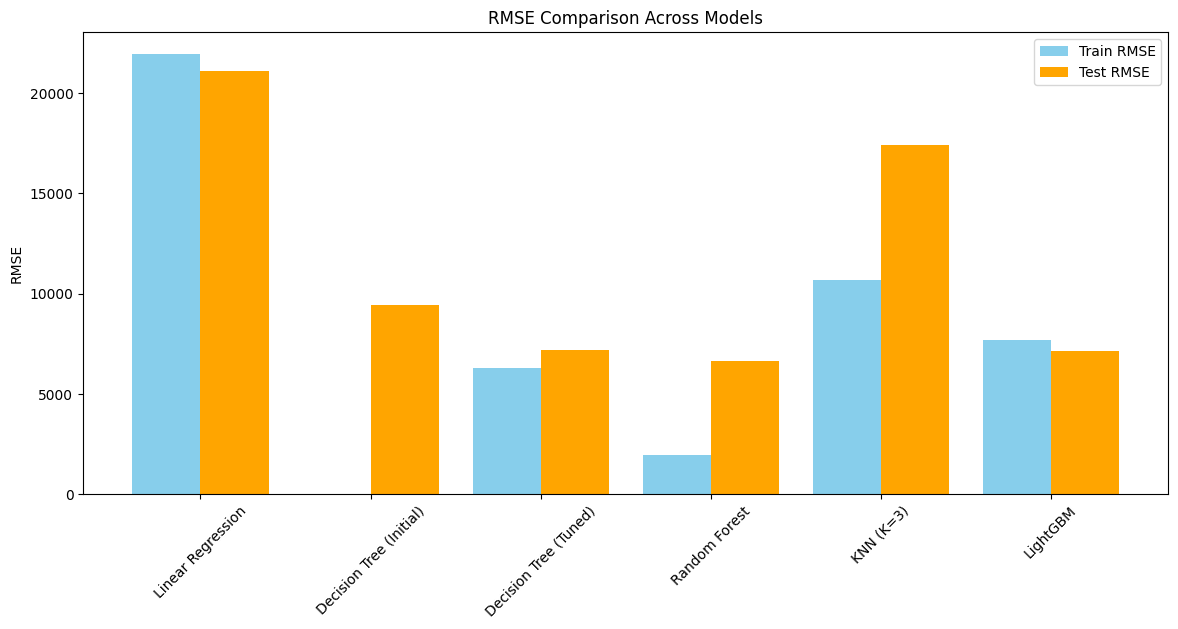

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Data for model performance
models = [
    "Linear Regression",
    "Decision Tree (Initial)",
    "Decision Tree (Tuned)",
    "Random Forest",
    "KNN (K=3)",
    "LightGBM"
]
train_rmse = [21935.07, 0, 6279.91, 1963.27, 10677.17, 7687.38]
train_r2 = [0.0874, 1.0, 0.9252, 0.9927, 0.7838, 0.8879]
test_rmse = [21087.27, 9434.72, 7198.92, 6638.78, 17412.06, 7152.52]
test_r2 = [0.0912, 0.8181, 0.8941, 0.9099, 0.3804, 0.8954]

# Bar positions
x = np.arange(len(models))

# Plot RMSE comparison
plt.figure(figsize=(14, 6))
plt.bar(x - 0.2, train_rmse, width=0.4, label="Train RMSE", color="skyblue")
plt.bar(x + 0.2, test_rmse, width=0.4, label="Test RMSE", color="orange")
plt.xticks(x, models, rotation=45)
plt.ylabel("RMSE")
plt.title("RMSE Comparison Across Models")
plt.legend()
plt.show()



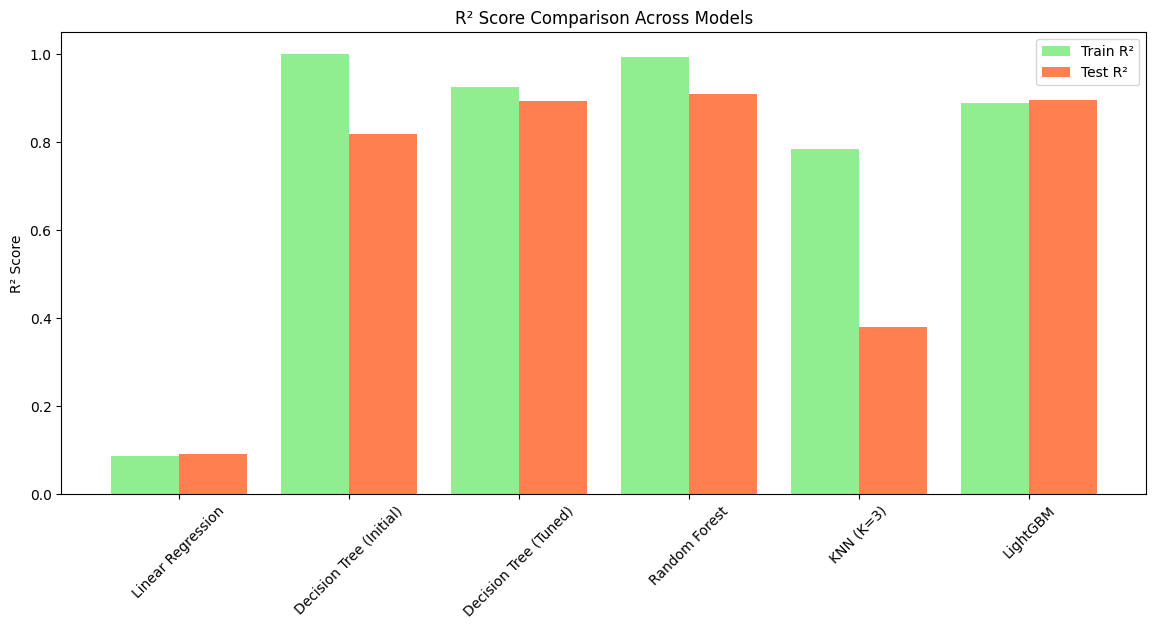

In [12]:

# Plot R² comparison
plt.figure(figsize=(14, 6))
plt.bar(x - 0.2, train_r2, width=0.4, label="Train R²", color="lightgreen")
plt.bar(x + 0.2, test_r2, width=0.4, label="Test R²", color="coral")
plt.xticks(x, models, rotation=45)
plt.ylabel("R² Score")
plt.title("R² Score Comparison Across Models")
plt.legend()
plt.show()